In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from plot_tools import set_size
from rp_calcs import calc_dioi_pred
from scipy.stats import zscore
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

In [2]:
df = pd.read_pickle('E://bacteria_data/dataframes/full_df3.pkl')
#df = df[df.pore=='pet2363']

# Figure 1

In [76]:
pet409 = df[(df.pore=='pet409') & (df.particle=='control')]
pet484 = df[(df.pore=='pet484') & (df.particle=='control')]
pet2363 = df[(df.pore=='pet2363') & (df.particle=='control')&(df.date=='11-16-21')]

In [75]:
pet2363.date.unique()

array(['11-16-21', '2-25-22'], dtype=object)

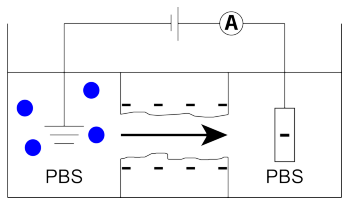

In [5]:
img_path = 'E://bacteria_data/figures/figure1/schemes/control_scheme.png'
img = plt.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

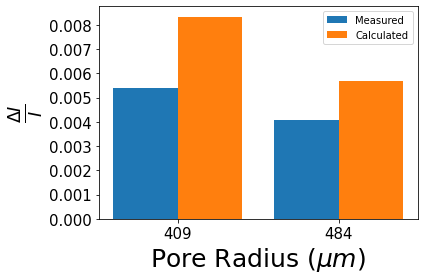

In [6]:
mean409,std409 = pet409.di_i2.mean(),pet409.di_i2.std()
mean484,std484 = pet484.di_i2.mean(),pet484.di_i2.std()
X = ['409','484']
X_axis = np.arange(len(X))
plt.bar(X_axis-.2,[mean409,mean484],0.4,label='Measured')
plt.bar(X_axis+.2,[calc_dioi_pred(0.40,.409*2,12),calc_dioi_pred(0.40,.484*2,12)],0.4,label='Calculated')

plt.ylabel(r'$\frac{\Delta I}{I}$',size=25)
plt.xlabel(r'Pore Radius ($\mu m$)',size=25)
plt.xticks(X_axis,X,fontsize = 15)
plt.yticks(fontsize=15)
plt.legend()
#plt.show()
plt.tight_layout()
#plt.savefig('E:/bacteria_data/figures/figure1/barplot.png',dpi=300)

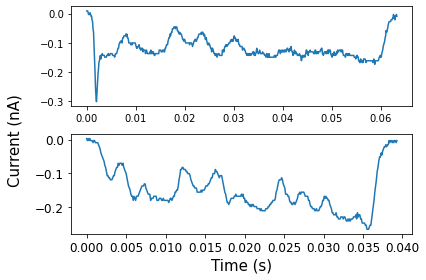

In [8]:
fig, (ax1,ax2) = plt.subplots(2,1)

event = pet409.iloc[1]
ax1.plot(event.t2-event.t2[0],event.i_clean2)
plt.tick_params(axis='both', which='major', labelsize=12)

event = pet484.iloc[5]
ax2.plot(event.t2-event.t2[0],event.i_clean2)
ax2.set_xlabel('Time (s)',size=15)

fig.supylabel('Current (nA)',size=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
#plt.savefig('E:/bacteria_data/figures/figure1/current_trace.png',dpi=300)

In [64]:
from scipy.ndimage.filters import uniform_filter1d

In [9]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

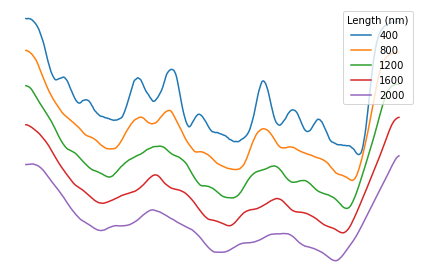

In [124]:
event = pet484.iloc[1]

lengths = [400,800,1200,1600,2000]
for i,L in enumerate(lengths):
    v = event.vel/1000
    f = 10**4
    L = L*10**(-9)
    N = round(f*L/v)

    a = uniform_filter1d(event.i_clean2,size=N)
    t = event.t2
    plt.plot(t,a-i*.05)
    plt.axis('off')

plt.legend(lengths,title='Length (nm)',loc='upper right')
plt.tight_layout()
plt.savefig('E://bacteria_data/figures/avg_signal.png',dpi=300)
plt.show()

In [115]:
str(lengths)

'[400, 800, 1200, 1600, 2000]'

In [58]:
len(t)

692

In [59]:
len(a)

692

In [49]:
len(t)

695

In [ ]:
plt.plot(event)

In [32]:
12*10**-6/(event['dt2'])

0.00018957345971564008

In [33]:
event['dt']

0.06349999999999945

In [18]:
event.vel

0.18897637795275757

In [76]:
from matplotlib.ticker import FormatStrFormatter
from plot_tools import set_size

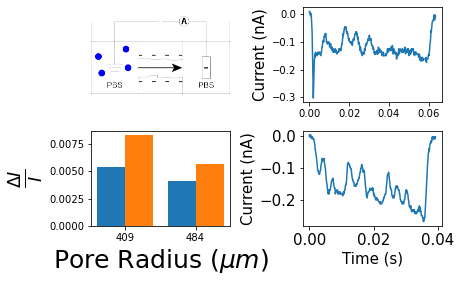

In [79]:
fig, axs = plt.subplots(2,2,figsize=set_size(469.7,fraction=1,hratio=1,subplots=(2,2)))
ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]

img_path = 'E://bacteria_data/figures/figure1/control_scheme.png'
img = plt.imread(img_path)
ax1.imshow(img)
ax1.axis('off')

event = pet409.iloc[1]
ax2.plot(event.t2-event.t2[0],event.i_clean2)
ax2.set_ylabel('Current (nA)',size=15)

event = pet484.iloc[5]
ax4.plot(event.t2-event.t2[0],event.i_clean2)
ax4.set_xlabel('Time (s)',size=15)
ax4.set_ylabel('Current (nA)',size=15)

mean409,std409 = pet409.di_i2.mean(),pet409.di_i2.std()
mean484,std484 = pet484.di_i2.mean(),pet484.di_i2.std()
X = ['409','484']
X_axis = np.arange(len(X))
ax3.bar(X_axis-.2,[mean409,mean484],0.4,label='Measured')
ax3.bar(X_axis+.2,[calc_dioi_pred(0.40,.409*2,12),calc_dioi_pred(0.40,.484*2,12)],0.4,label='Calculated')

ax3.set_ylabel(r'$\frac{\Delta I}{I}$',size=25)
ax3.set_xlabel(r'Pore Radius ($\mu m$)',size=25)
ax3.set_xticks(X_axis)
ax3.set_xticklabels(X)

plt.tick_params(axis='both', which='major', labelsize=15)

#ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.tight_layout()
plt.show()

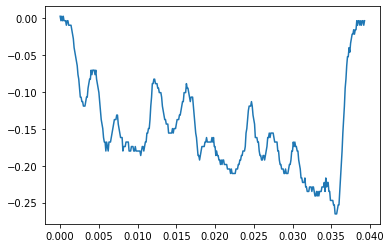

# Figure 2

In [126]:
import matplotlib

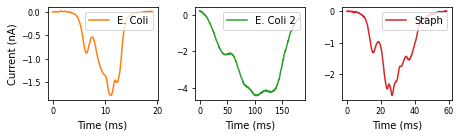

In [138]:
label_size = 10
tick_size = 8

fig, axs = plt.subplots(1,3,figsize=set_size(470,hratio=.5))
axs = axs.ravel()

i = 90
df_ecoli = df[(df.particle=='ecoli')&(df.run=='0')&(df.date=='11-30-21')]
event = df_ecoli.iloc[i]
t = event.t2*1000
i = event.i_clean2[::-1]

current_palette = matplotlib.colors.hex2color('#ff7f0e')
axs[0].plot(t-t[0],i,color=current_palette,label='E. Coli')

axs[0].set_ylabel('Current (nA)',size=label_size)

axs[0].tick_params(axis='both', which='major', labelsize=tick_size)
axs[0].set_xlabel('Time (ms)', size = label_size)
axs[0].legend(loc='upper right')


df_ecoli2 = df[(df.particle=='ecoli2')&(df.run=='0')]
i = 35
event = df_ecoli2.iloc[i]
t = event.t2*1000
i = event.i_clean2[::-1]

current_palette = matplotlib.colors.hex2color('#2ca02c')
axs[1].plot(t-t[0],i,color=current_palette,label='E. Coli 2')
axs[1].legend(loc='upper right')
#axs[4].set_ylabel('Current (nA)',size=16)

axs[1].tick_params(axis='both', which='major', labelsize=tick_size)
axs[1].set_xlabel('Time (ms)', size = label_size)



i = 35
df_staph = df[(df.particle=='staph')&(df.date=='12-17-21')].reset_index()
event = df_staph.iloc[i]
t = event.t2*1000
i = event.i_clean2[::-1]

current_palette = matplotlib.colors.hex2color('#d62728')
axs[2].plot(t-t[0],i,color=current_palette,label='Staph')

#axs[5].set_ylabel('Current (nA)',size=16)

axs[2].tick_params(axis='both', which='major', labelsize=tick_size)
axs[2].set_xlabel('Time (ms)', size = label_size)
axs[2].legend(loc='upper right')
plt.tight_layout()
plt.savefig('E://bacteria_data/figures/figure1/figure1.png',dpi=300)
plt.show()

In [ ]:
current_palette = matplotlib.colors.hex2color('#ff7f0e')
sns.histplot(data=df[df.particle=='ecoli'],x='volume',kde='True',bins=20,ax=ax1,color=current_palette)

current_palette = matplotlib.colors.hex2color('#2ca02c')
sns.histplot(data=df[df.particle=='ecoli2'],x='volume',kde='True',bins=20,ax=ax2,color=current_palette)

current_palette = matplotlib.colors.hex2color('#d62728')
sns.histplot(data=df[df.particle=='staph'],x='volume',kde='True',bins=20,ax=ax3,color=current_palette)

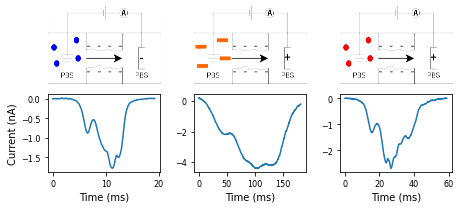

In [23]:
label_size = 10
tick_size = 8

fig, axs = plt.subplots(2,3,figsize=set_size(470,hratio=.75))
axs = axs.ravel()

img = plt.imread('E://bacteria_data//figures//figure1//Control_Scheme.png')
axs[0].imshow(img,aspect='auto')
axs[0].axis('off')

img = plt.imread('E://bacteria_data//figures//figure1//EColi_Scheme.png')
axs[1].imshow(img,aspect='auto')
axs[1].axis('off')

img = plt.imread('E://bacteria_data//figures//figure1//Staph_Scheme.png')
axs[2].imshow(img,aspect='auto')
axs[2].axis('off')


i = 90
df_ecoli = df[(df.particle=='ecoli')&(df.run=='0')&(df.date=='11-30-21')]
event = df_ecoli.iloc[i]
t = event.t*1000
i = event.i_clean[::-1]

axs[3].plot(t-t[0],i)

axs[3].set_ylabel('Current (nA)',size=label_size)

axs[3].tick_params(axis='both', which='major', labelsize=tick_size)
axs[3].set_xlabel('Time (ms)', size = label_size)



df_ecoli2 = df[(df.particle=='ecoli2')&(df.run=='0')]
i = 35
event = df_ecoli2.iloc[i]
t = event.t*1000
i = event.i_clean[::-1]

axs[4].plot(t-t[0],i)

#axs[4].set_ylabel('Current (nA)',size=16)

axs[4].tick_params(axis='both', which='major', labelsize=tick_size)
axs[4].set_xlabel('Time (ms)', size = label_size)



i = 35
df_staph = df[(df.particle=='staph')&(df.date=='12-17-21')].reset_index()
event = df_staph.iloc[i]
t = event.t*1000
i = event.i_clean[::-1]

axs[5].plot(t-t[0],i)

#axs[5].set_ylabel('Current (nA)',size=16)

axs[5].tick_params(axis='both', which='major', labelsize=tick_size)
axs[5].set_xlabel('Time (ms)', size = label_size)

plt.tight_layout()
plt.savefig('E://bacteria_data/figures/figure1/figure1.png',dpi=300)
#plt.show()

# Figure 3

In [7]:
from scipy.stats import zscore
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

In [4]:
df1 = df[df.pore=='pet2363']
df_ecoli = df1[(df1.particle=='ecoli')& (df1.date=='11-30-21')&(df1.run=='1')]
df_ecoli2 = df1[(df1.particle=='ecoli2')]
df_staph = df1[df1.particle=='staph']
df2 = pd.concat([df_ecoli,df_ecoli2,df_staph],ignore_index=True)

<AxesSubplot:xlabel='dt', ylabel='di_i'>

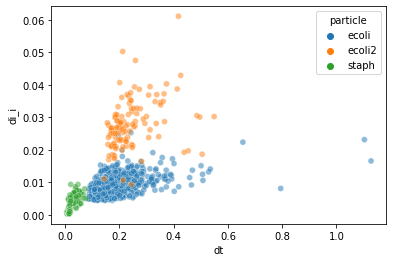

In [28]:
sns.scatterplot(data=df2,x='dt',y='di_i',hue='particle',alpha=0.5)

In [8]:
zs = df2.groupby('particle')[['dt','di_i']].transform(zscore).add_suffix('_zscore')
df2_filt = df2[(np.abs(zs['dt_zscore'])<3)&(np.abs(zs['di_i_zscore'])<3)].reset_index()
conditions = [df2_filt.particle=='ecoli',df2_filt.particle=='ecoli2',df2_filt.particle=='staph']
choices = [1,1,-1]
df2_filt['dir'] = np.select(conditions,choices)

In [9]:
x = df2_filt[['dt','di_i']]
class_dict = {'ecoli': 0, 'ecoli2': 1,'staph':2}
y = df2_filt.apply(lambda a: class_dict[a['particle']], axis=1).to_numpy()

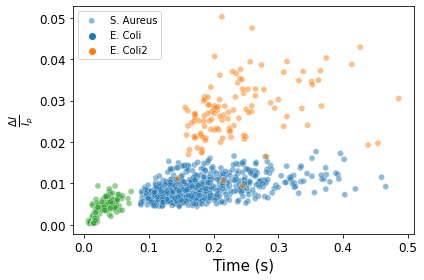

In [45]:
sns.scatterplot(data=df2_filt,x='dt',y='di_i',hue='particle',alpha=0.5)
plt.xlabel('Time (s)',size=15)
plt.ylabel(r'$\frac{\Delta I}{I_p}$',size=15)
plt.tick_params(axis='both',labelsize=12)
plt.legend(['S. Aureus','E. Coli','E. Coli2'])
plt.tight_layout()
plt.savefig('E:/bacteria_data/figures/figure3/scatter.png',dpi=300)
plt.show()

<AxesSubplot:xlabel='dt', ylabel='di_i'>

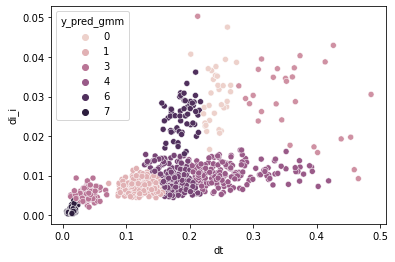

In [26]:
gmm = GaussianMixture(n_components=8,random_state=42,covariance_type='full',max_iter=10000,tol=10**-3).fit(x)
y_pred_gmm = gmm.predict(x)
df2_filt['y_pred_gmm'] = y_pred_gmm
sns.scatterplot(data=df2_filt,x='dt',y='di_i',hue='y_pred_gmm')

C:\Users\codyt\.conda\envs\rpbacteria\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


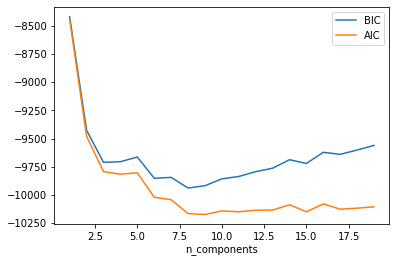

In [25]:
n_components = np.arange(1, 20)
models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(x)
          for n in n_components]

plt.plot(n_components, [m.bic(x) for m in models], label='BIC')
plt.plot(n_components, [m.aic(x) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

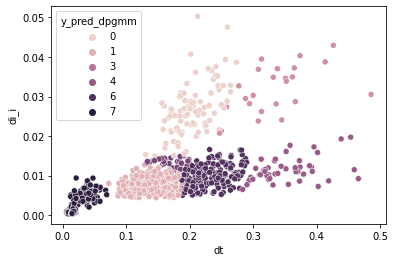

In [48]:
dpgmm = BayesianGaussianMixture(n_components=10,random_state=42,covariance_type='full').fit(x)
y_pred_dpgmm = dpgmm.predict(x)
df2_filt['y_pred_dpgmm'] = y_pred_dpgmm
sns.scatterplot(data=df2_filt,x='dt',y='di_i',hue='y_pred_dpgmm')
plt.show()

# Figure 4

In [8]:
df36 = df[df.pore=='pore36']
zs = df36.groupby('particle')[['dt','di_i']].transform(zscore).add_suffix('_zscore')
df36_filt = df36[(np.abs(zs['dt_zscore'])<3)&(np.abs(zs['di_i_zscore'])<3)].reset_index()

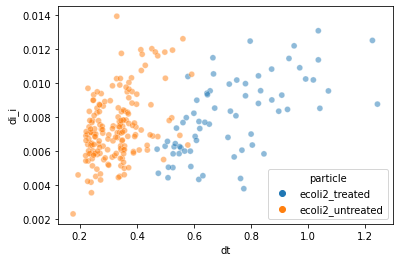

In [11]:
sns.scatterplot(data=df36_filt,x='dt',y='di_i',hue='particle',alpha=0.5)
plt.show()

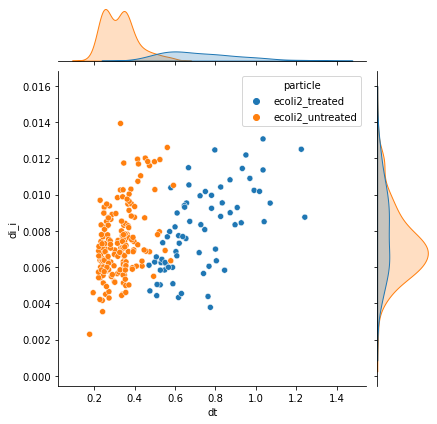

In [13]:
sns.jointplot(data=df36_filt,x='dt',y='di_i',hue='particle')
plt.show()